In [18]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
features = ['pregnency', 'glucose', 'BP', 'skin', 'insulin', 'BMI', 'DiabetesPedigree', 'age', 'class']
X_features = ['pregnency', 'glucose', 'BP', 'skin', 'insulin', 'BMI', 'DiabetesPedigree', 'age']
data = pd.read_csv('datasets_14370_19291_pima-indians-diabetes.csv', names=features)

In [34]:
X = data.iloc[:,0:8]
#d = preprocessing.normalize(X)
#X = pd.DataFrame(d, columns=X_features)

In [35]:
X['BP']=X['BP'].replace(0,X['BP'].mean())
X['skin']=X['skin'].replace(0,X['skin'].mean())
X['BMI']=X['BMI'].replace(0,X['BMI'].mean())
X['age']=X['age'].replace(0,X['age'].mean())

In [36]:
#for col in X_features:
    #X[col]=X[col]/X[col].max()

In [37]:
X

,pregnency,glucose,BP,skin,insulin,BMI,DiabetesPedigree,age
0,6,148,72.0,35.000000,0,33.6,0.627,50
1,1,85,66.0,29.000000,0,26.6,0.351,31
2,8,183,64.0,20.536458,0,23.3,0.672,32
3,1,89,66.0,23.000000,94,28.1,0.167,21
4,0,137,40.0,35.000000,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000000,180,32.9,0.171,63
764,2,122,70.0,27.000000,0,36.8,0.340,27
765,5,121,72.0,23.000000,112,26.2,0.245,30
766,1,126,60.0,20.536458,0,30.1,0.349,47


In [38]:
Y = data.iloc[:,8]

In [39]:
Y.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: class, dtype: int64

In [94]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='HeUniform', kernel_regularizer=l1(0.001), activation='relu'))
model.add(Dense(16, kernel_initializer='HeUniform', activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(1, kernel_initializer='HeUniform', activation='sigmoid'))

In [95]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
es = EarlyStopping(monitor='val_accuracy',mode='max',restore_best_weights=True,patience=400)

In [97]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

In [98]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=10, callbacks=[es], verbose=0)

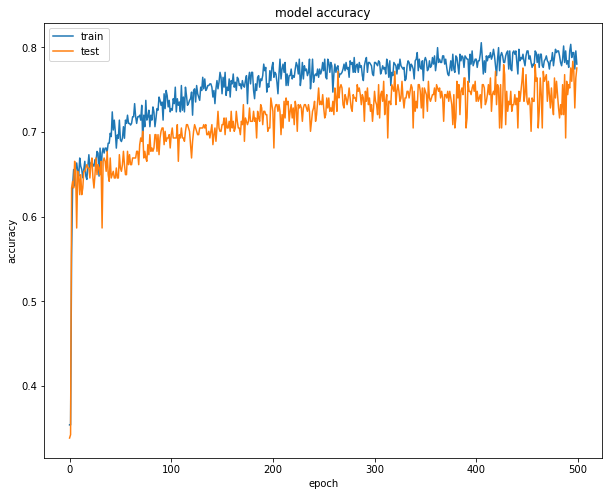

In [99]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

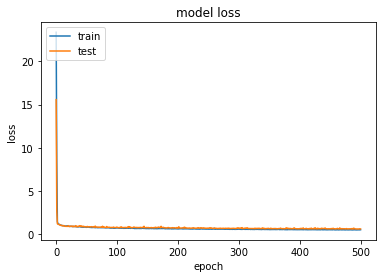

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
model.evaluate(X_val, y_val)

8/8 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7756


[0.5931913256645203, 0.7755905389785767]

In [102]:
model.evaluate(X_train,y_train)

17/17 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7918


[0.46643248200416565, 0.7918288111686707]